# Introduction
RMS Titanic was a British passenger liner, operated by the White Star Line, that sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time. It remains the deadliest peacetime sinking of an ocean liner or cruise ship.

<font color = 'blue'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing: Age Feature](#20)
1. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
1. [Modeling](#29)
    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32) 
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-bright")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Load and Check Data
<a id="1"></a><br/>

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_passenger_id = test_df["PassengerId"]  # for submission file

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Variable Description
<a id="2"></a>
Feature description for helping us to understand data.

1. PassengerId: unique id number to each passenger
2. Survived: passenger survive(1) or died(0)
3. Pclass: passenger class a proxy for socio-economic status (SES) (1st = Upper, 2nd = Middle, 3rd = Lower)
4. Name: name
5. Sex: male, female
6. Age: age of passenger
7. SibSp: number of siblings/spouses in Titanic
8. Parch: number of parents/children in Titanic
9. Ticket: ticket number
10. Fare: amount of money spent on ticket
11. Cabin: cabin category
12. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [6]:
train_df.info()  # object: actually string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare ve Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): Cabin, embarked, ticket, name and sex

## Univariate Variable Analysis

UVA means that we analyze one variable. We will try to understand just one variable. For example, we will try to understand survived variable.
<a id="3"></a>
* Categorical Variable Analysis
* Numerical Variable Analysis

### Categorical Variable
<a id="4"></a>
Categorical variable is that take values in each of a set of categories. For example, survived variable is categorical variable and take 0 and 1 values.
Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch are categorical variables.

In [7]:
def bar_plot(variable):
    """
    input: variable ex is Sex. output: bar plot + value count
    """
    variable = train_df[variable] # get feature (variable)
    variable_value = variable.value_counts()  # count number of categorical variable (for ex: sex)

    # visualize
    plt.figure(figsize = (9, 3))
    plt.bar(variable_value.index, variable_value)  # category name: x axis, variable_value: y axis
    plt.xticks(variable_value.index, variable_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable.name)
    plt.show()
    print("{}: \n {}".format(variable.name, variable_value))

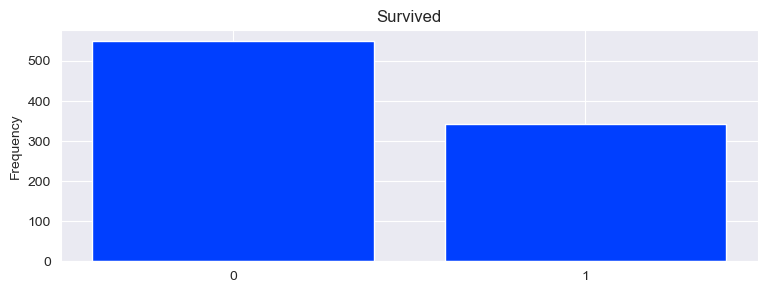

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


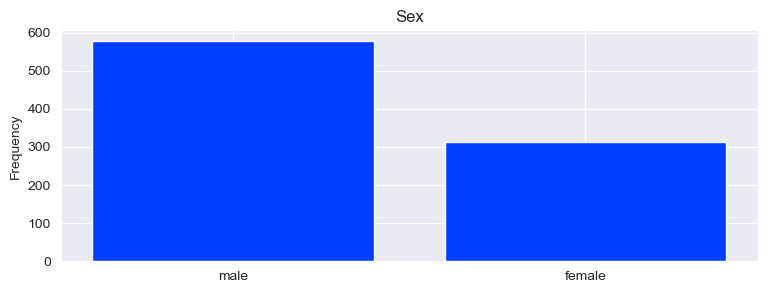

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


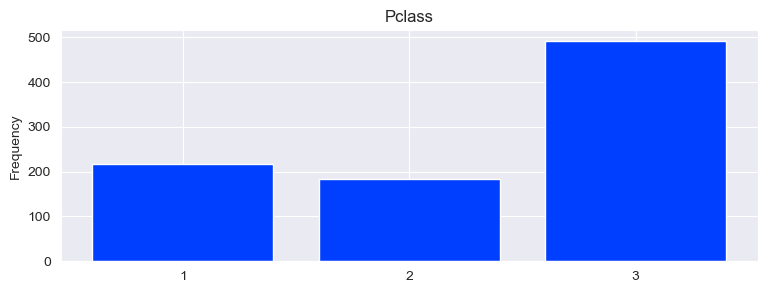

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


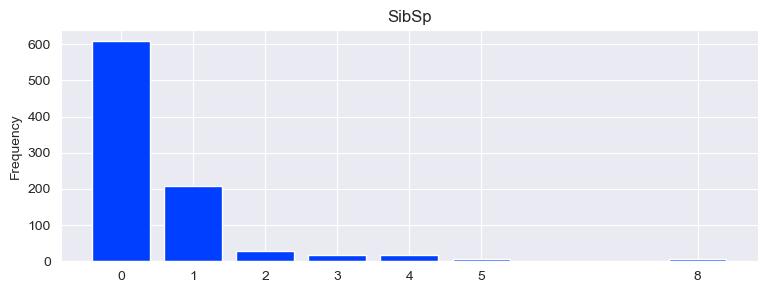

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


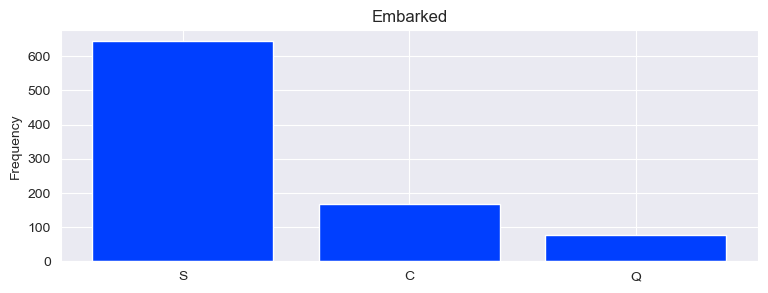

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


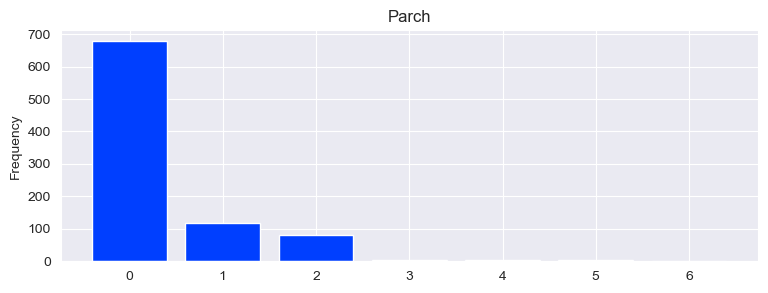

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
categorical_features = ["Survived", "Sex", "Pclass", "SibSp", "Embarked", "Parch"]
for c in categorical_features:
    bar_plot(c)

Data is imbalanced. Because number of survived(1) is less than number of not survived(0).
Pclass: 3rd class is the most crowded class. 3rd class is the cheapest class.
Embarked: Most of the passengers embarked from Southampton.
SibSp: Most of the passengers traveled alone. (0)
Parch: Most of the passengers traveled alone. (0)

In [9]:
categorical_features2 = ["Cabin", "Name", "Ticket"]
for c in categorical_features2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



### Numerical Variable
<a id="5"></a>
Numerical variable is that take values in each of a set of numbers. For example, age variable is numerical variable.
Age and Fare are numerical variables.

In [10]:
def plot_hist(variable):
    plt.figure(figsize = (8, 3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency (Sample Count)")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

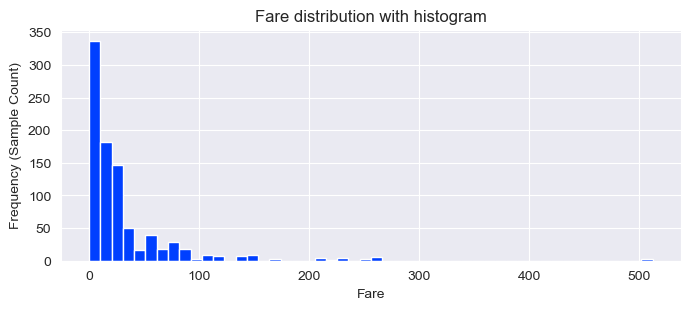

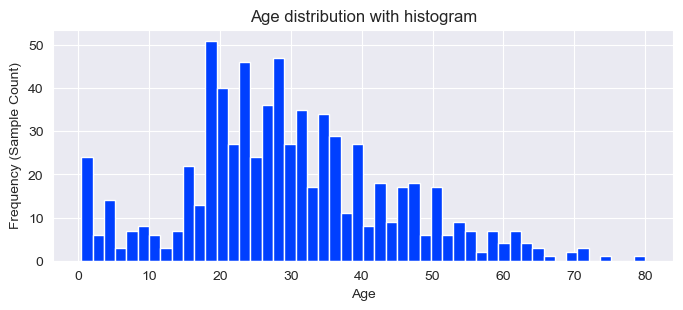

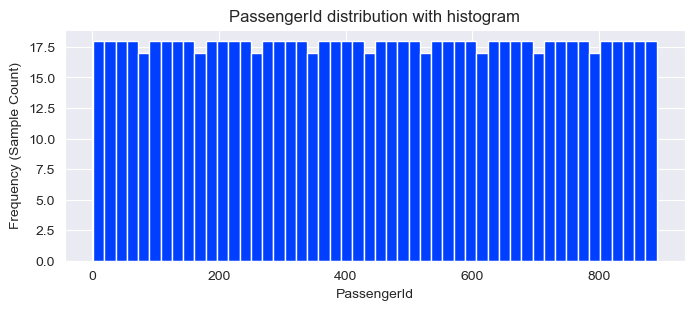

In [11]:
numeric_variable = ["Fare", "Age", "PassengerId"]
for n in numeric_variable:
    plot_hist(n)

PassengerId: it is unique id number to each passenger. It must be drop.
Fare: amount of money spent on ticket. Most of the passengers paid less than 100 for ticket.
Age: most of the passengers are between 20 and 30 years old.  There are babies(0-5) and older passengers(70) too. There are lots of babies.

## Basic Data Analysis
<a id="6"></a>

We will learn the relationship between some features.
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

#### Pclass vs Survived

In [12]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


People with class 1 category have a higher probability of survival than other classes.

#### Sex - Survived

In [13]:
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index= False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Women are more likely to survive than men

#### SibSp - Survived

In [14]:
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index= False).mean().sort_values(by = "Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


People with 0, 1 or 2 siblings are more likely to survive. Therefore, a new feature can be added. People who have less than 2 and more than 2 siblings

#### Parch - Survived

In [15]:
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index= False).mean().sort_values(by = "Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


People with 0, 1, 2 or 3 parents/children are more likely to survive. Parch and SibSp can be used for new feature extraction.

## Outlier Detection
<a id="7"></a>
Outlier is a data point that differs significantly from other observations. Outliers can cause problems in statistical analyses.

In [16]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:

        Q1 = np.percentile(df[c], 25)  # 1st quartile means 25% of all data. Median of 1st half of data.

        Q3 = np.percentile(df[c], 75)  # 3rd quartile means 75% of all data. Median of 2nd half of data.

        IQR = Q3 - Q1  # IQR is range of data. IQR = Q3 - Q1

        # outlier step
        outlier_step = IQR * 1.5  # if data is less than Q1 - outlier_step or greater than Q3 + outlier_step, it is outlier. (1.5 is standard value)

        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index  # outlier_list_col is list of outlier indeces

        # store indeces
        outlier_indices.extend(outlier_list_col)


    outlier_indices = Counter(outlier_indices)  # Counter function count number of each element (index) in list. For example, if outlier_indices = [1, 1, 1, 2, 2, 3], Counter(outlier_indices) = {1:3, 2:2, 3:1}.
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)  # if there are more than 2 outliers in a sample (row), we should delete them. So If there are 2 outliers in an index. We should not delete them.
    print("Outliers: ", multiple_outliers)
    return multiple_outliers

In [17]:
train_df.loc[detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

Outliers:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [18]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"]), axis = 0).reset_index(drop = True) # reset_index(drop = True) means that we do not want to save old index.
train_df

Outliers:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Missing Value
<a id="8"></a>
Missing value is that NaN or empty value. We should handle missing value. If we do not handle missing value, we can not train our model. Missing values are also checked in both test and train data.

In [19]:
train_df_len = len(train_df) # train_df_len is number of rows in train data.
train_df = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True) # concat train and test data to handle missing value in both data.

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Find Missing Value
<a id="9"></a>

In [21]:
train_df.columns[train_df.isnull().any()] # columns that have missing value

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [22]:
train_df.isnull().sum() # number of missing value in each column

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

We will only fill in the empty values in mouse and embarked. Because we do not have detailed information about others.

#### Fill Missing Value
<a id="10"></a>

Embarked has 2 missing values.
Fare has only 1 missing value.

In [23]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


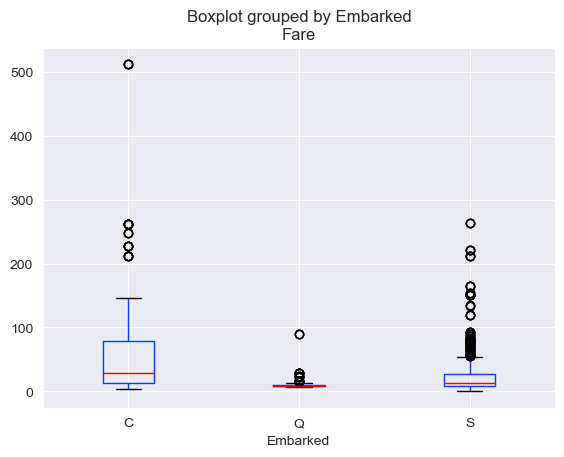

In [24]:
train_df.boxplot(column = "Fare", by = "Embarked")
plt.show()

Fare is related to Embarked. So we can fill in the missing value with C.

In [25]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")

In [26]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [27]:
np.mean(train_df[train_df["Pclass"] == 3]["Fare"])

12.741219971469327

In [28]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [29]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Visualization
<a id="11"></a>

### Correlation Between SibSp -- Parch -- Age -- Fare -- Survived
<a id="12"></a>
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.

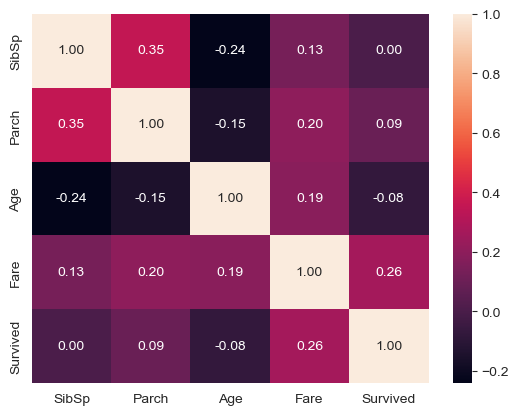

In [30]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")  # annot = True means that we want to see correlation values in heatmap. fmt = ".2f" means that we want to see 2 digits after comma.
plt.show()

Fare feature seems to have correlation with survived feature (0.26). There is a relationship between fare and survival. The more money the passengers paid, the higher their chances of survival.

### SibSp -- Survived
<a id="13"></a>

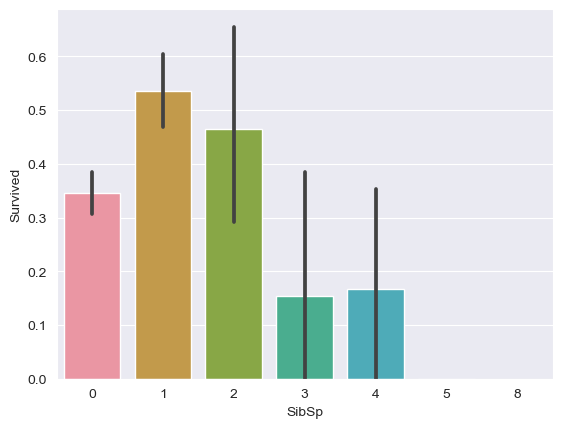

In [31]:
g = sns.barplot(x = "SibSp", y = "Survived", data = train_df)  # factorplot is used to show categorical variables.
plt.show()

* If there is more than 2 sibsp, the probability of death increases.
* We can consider a new feature describing these categories. For example, if SibSp is more than 2, we can assign 2, otherwise we can assign 1.
* Having 2 or less siblings or spouses has a higher chance of survival.

### Parch -- Survived
<a id="14"></a>

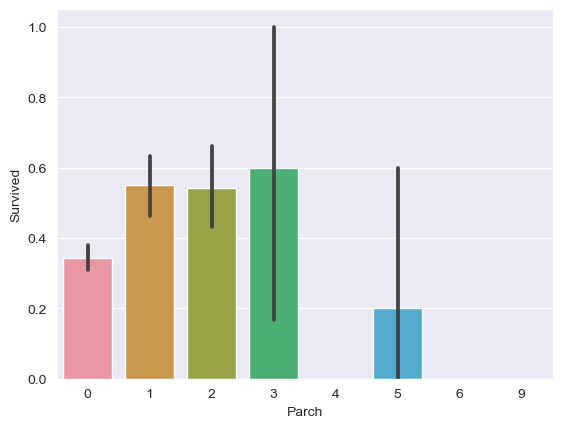

In [32]:
g = sns.barplot(x = "Parch", y = "Survived", data = train_df)
plt.show()

* Small families have a better chance of survival than larger families and those traveling alone.
* For those with a Patch value of 3, it varies between 0.2 and 1. (Standard deviation)
* SibSp and Parch can be used for new feature extraction with threshold = 3.
* There is a standard deviation in survival rates for those with a Parch value of 3.

### Pclass -- Survived
<a id="15"></a>

<Axes: xlabel='Pclass', ylabel='Survived'>

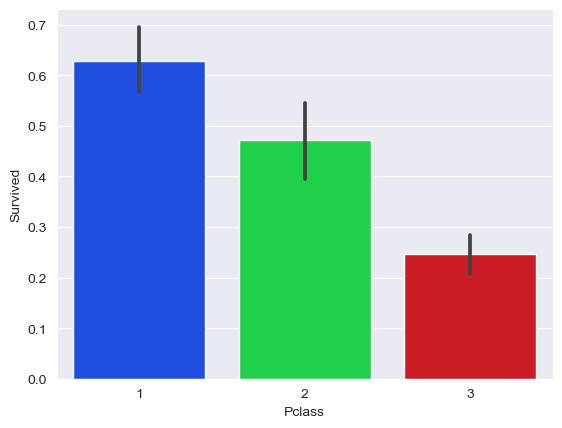

In [33]:
sns.barplot(x = "Pclass", y = "Survived", data = train_df)

* The higher the class, the higher the chance of survival.
* Pclass is an important feature for the model.

### Age -- Survived
<a id="16"></a>

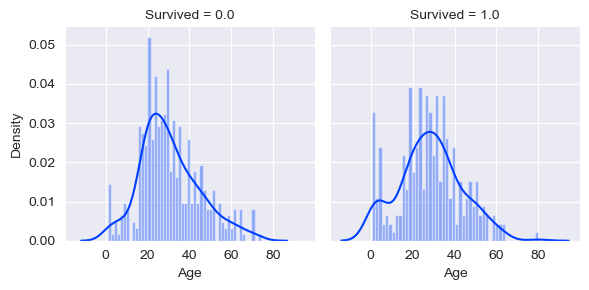

In [34]:
g = sns.FacetGrid(train_df, col = "Survived")  # FacetGrid is used to show multiple plots in one figure.
g.map(sns.distplot, "Age", bins = 50) # distplot is used to show distribution of a variable.
plt.show()

* The children were saved.
* Age <= 10 has a high survival rate.
* Oldest passengers (80) survived. (Although very few)
* Many 20-year-olds did not survive.
* most passengers are in 15-35 age range.
* use age distribution for missing value of age.
* use age feature in training.

### Pclass -- Survived -- Age
<a id="17"></a>

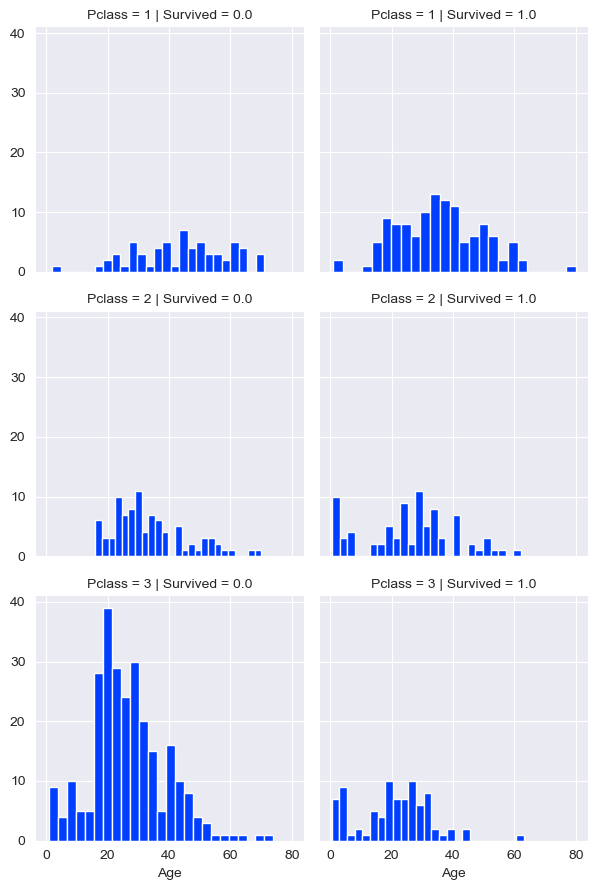

In [35]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25) # X axis is age, Y axis is number of people.
g.add_legend()
plt.show()

Pclass 1 has a high survival rate, especially for children. Pclass 3 has a very low survival rate for passengers between 20 and 40 years old.
Pclass is an important feature for the model.

### Embarked -- Sex -- Pclass -- Survived
<a id="18"></a>

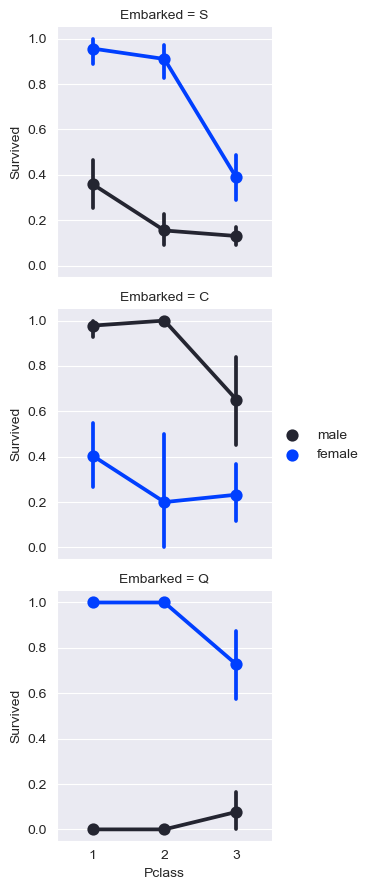

In [36]:
g = sns.FacetGrid(train_df, row = "Embarked")  # row = "Embarked" means that we want to see Embarked in rows.
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

Sex and survival are related.
Female passengers have much better survival rate than males
Males have better survival rate in Pclass 3 in C.
Embarked and sex will be used in training

### Embarked -- Sex -- Fare -- Survived
<a id="19"></a>

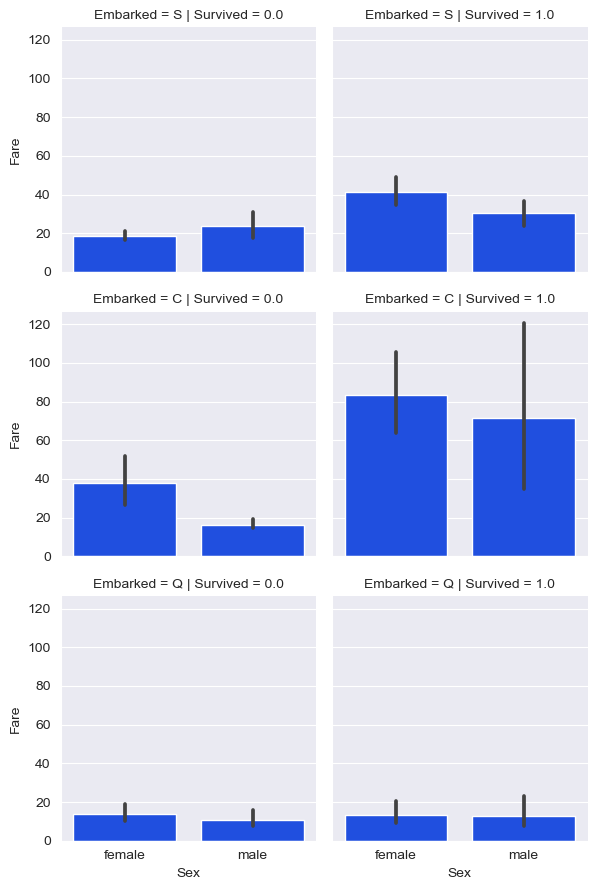

In [37]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived")  # col = "Survived" means that we want to see Survived in columns. row = "Embarked" means that we want to see Embarked in rows.
g.map(sns.barplot, "Sex", "Fare")  # barplot is used to show mean of a variable.
g.add_legend()
plt.show()

* Usually, passengers who pay more have a higher survival rate. Fare can be used as categorical for training. For example: 0-25 :0, 25-50 :1, 50-75 :2,
* In Port S, C, those who paid more survived the most. However, In port Q the difference is small.
* Embarked can be used in training.
* Female survivors paid more than men.

### Fill Missing: Age Feature
<a id="20"></a>

In [38]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='Age'>

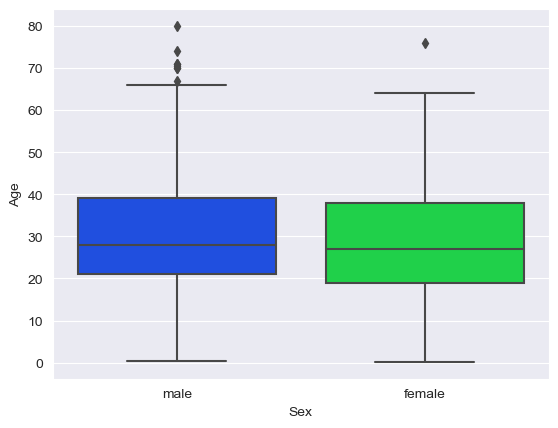

In [39]:
sns.boxplot(x="Sex", y="Age", data=train_df)

Age cannot be estimated based on whether it is male or female. Because the median ages of the passengers are very close to each other.
So, Sex is not informative to predict age. Age distribution seems to be same.

<Axes: xlabel='Sex', ylabel='Age'>

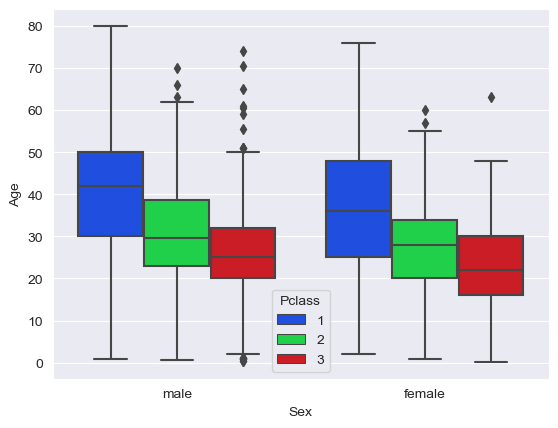

In [40]:
sns.boxplot(x="Sex", y="Age", hue="Pclass", data=train_df)

1st class older than 2nd, and 2nd is older than 3rd class. So, Pclass is informative to predict age. We can use Pclass for missing age. Median age of 1st class is 40, median age of 2nd class is 30, median age of 3rd class is 25.

<Axes: xlabel='Parch', ylabel='Age'>

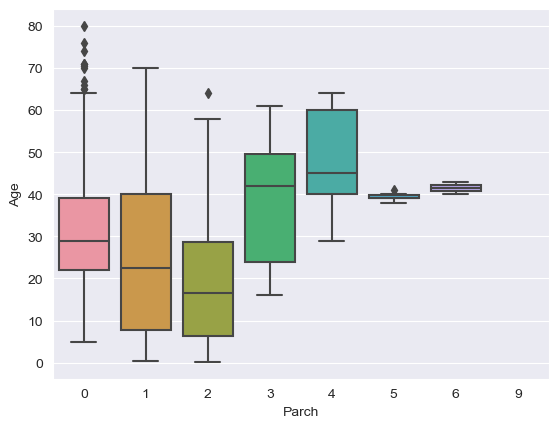

In [41]:
sns.boxplot(x="Parch", y="Age", data=train_df)

0, 1, 2 parch values have similar median. 3, 4, 5 parch values have similar median.

<Axes: xlabel='SibSp', ylabel='Age'>

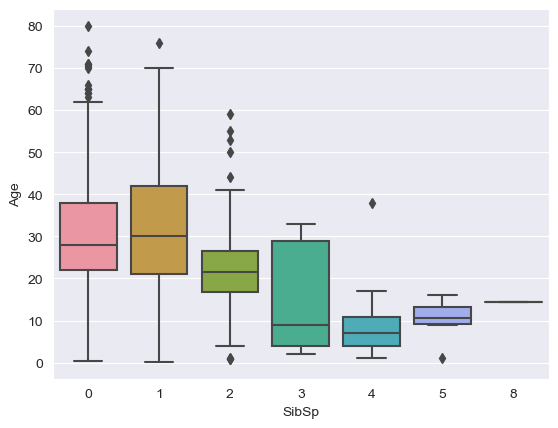

In [42]:
sns.boxplot(x="SibSp", y="Age", data=train_df)

0, 1, 2 sibsp values have similar median. 3, 4, 5, 6 sibsp values have similar median.

When the user with ID 5 is tried with these 3 different methods, they are approximately 25 years old.

In [43]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]  # Converting sex to a number to appear on the heatmap.

<Axes: >

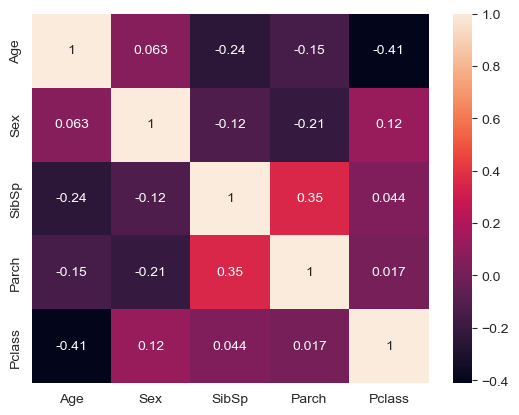

In [44]:
sns.heatmap(train_df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot=True)

There is no relationship between age and gender. There is a relationship between sibsb, parch and pclass and age. (Negative correlation)

In [45]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)  # Finding the indexes of the missing age values.

for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Parch"]) & (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median() # Finding the median of the age values of the people with the same sibsp, parch and pclass values as the missing age value.

    age_med = train_df["Age"].median()  # Finding the median of the age values. Because the median of the age values of the people with the same sibsp, parch and pclass values as the missing age value may not be found.

    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [46]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [47]:
train_df["Age"][train_df["Pclass"] == train_df.iloc[1]["Pclass"]]

1       38.0
3       35.0
6       54.0
11      58.0
23      28.0
        ... 
1284    17.0
1285    43.0
1288    50.0
1292    37.0
1295    39.0
Name: Age, Length: 320, dtype: float64

## Feature Engineering
<a id="21"></a>

* Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.

### Name -- Title
<a id="22"></a>


In [48]:
train_df["Name"].head(8)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
Name: Name, dtype: object

People's names are unimportant, but the features such as mr, mrs and miss at the beginning of their names are important. (Moran, Mr. James)

In [49]:
name_test = "Moran, Mr. James"
name_test.split(".")[0].split(",")[-1].strip()

'Mr'

In [50]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]  # Adding a new column called Title to the data set.

In [51]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

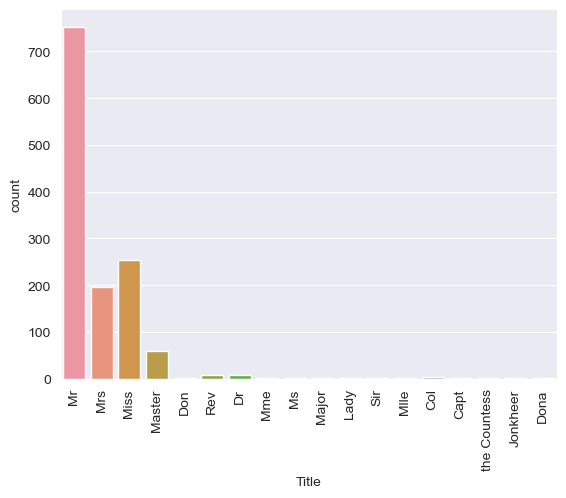

In [52]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=90)
plt.show()

There are so many varieties, let's combine the many.
* Mr : 0, Mrs : 1, Miss : 2, Others : 3

In [53]:
# Converting titles to numbers. (converting categorical)

train_df["Title"] = train_df["Title"].replace(["Lady", "the Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Other")

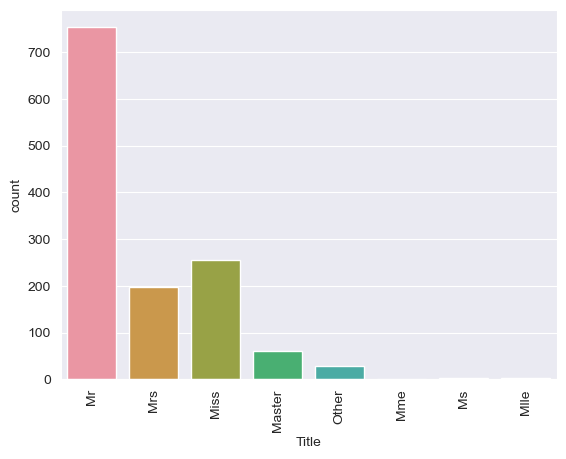

In [54]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=90)
plt.show()

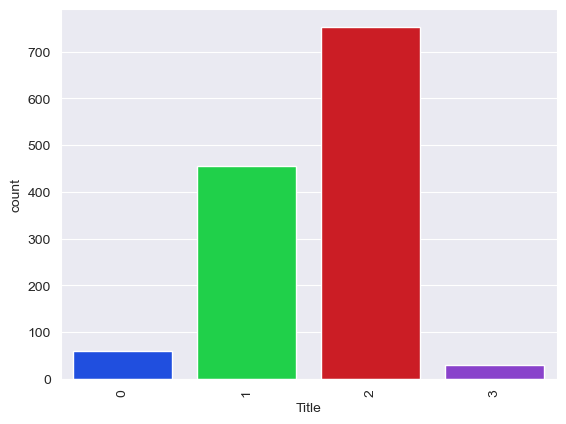

In [55]:
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]  # Converting titles to numbers. (converting categorical) # 0: Master, 1: Mrs, 2: Mr, 3: Other. Mrs, Miss, Ms and Mlle are all the same.
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Survival Probability')

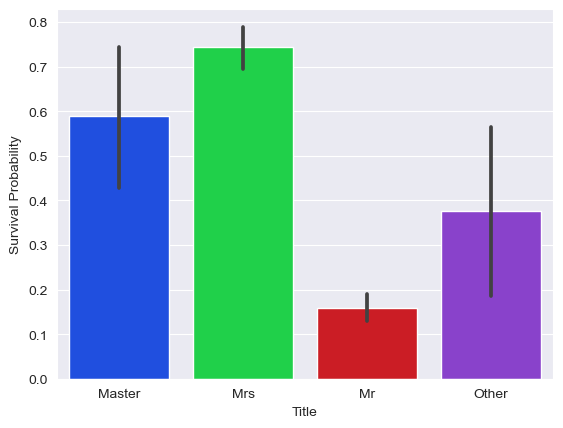

In [56]:
g = sns.barplot(x="Title", y="Survived", data=train_df)
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabel("Survival Probability")

Women have the highest survival rate. (mrs)

In [57]:
train_df.drop(labels=["Name"], axis=1, inplace=True)  # Dropping the name column.

In [58]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [59]:
train_df = pd.get_dummies(train_df, columns=["Title"])  # Converting the title column to categorical. One hot encoding.
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


### Family Size
<a id="23"></a>

In [60]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


* SibSp: Number of siblings / spouses aboard the Titanic
* Parch: Number of parents / children aboard the Titanic

In [61]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1  # Adding 1 to include the person himself.

In [62]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,FamilySize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


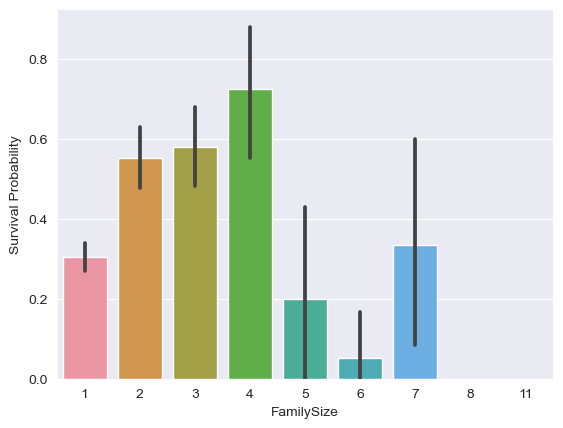

In [63]:
g = sns.barplot(x="FamilySize", y="Survived", data=train_df)
g.set_ylabel("Survival Probability")
plt.show()

It can be divided into 3 categories, for example, between 0 and 1, between 1 and 4, and above 4. But I will divide it into 2 categories. Values less than 4.5 and values greater than 4.5

In [64]:
train_df["FSize"] = [1 if i < 4.5 else 0 for i in train_df["FamilySize"]]

In [65]:
train_df.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,FamilySize,FSize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1


<Axes: xlabel='FSize', ylabel='count'>

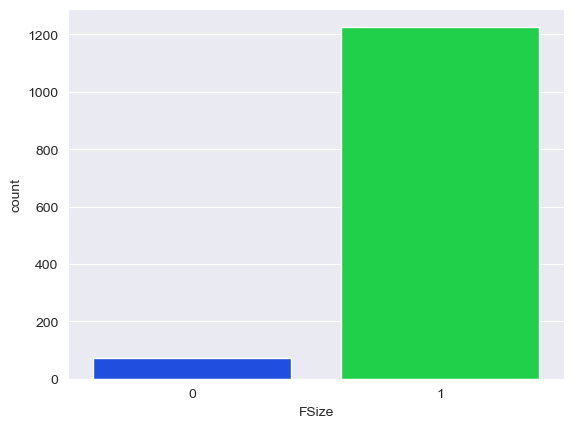

In [66]:
sns.countplot(x="FSize", data=train_df)

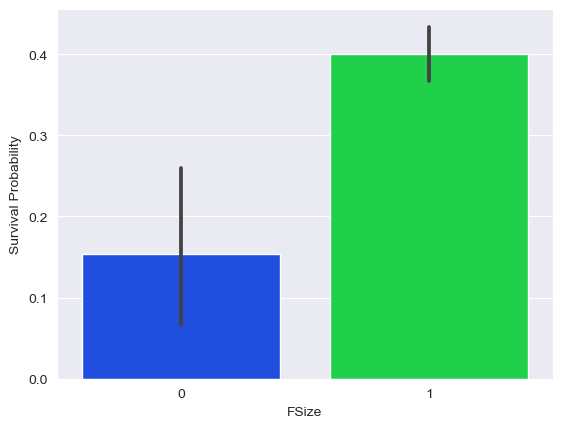

In [67]:
g = sns.barplot(x="FSize", y="Survived", data=train_df)
g.set_ylabel("Survival Probability")
plt.show()

Large families have lower survival rates.
Small families have more change to survive than big families.

In [68]:
train_df = pd.get_dummies(train_df, columns=["FSize"])  # Converting the FSize column to categorical. One hot encoding.
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,FamilySize,FSize_0,FSize_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,1,25.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1,0,1
1295,1306,NaN,1,0,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0,1,1,0,1
1296,1307,NaN,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1,0,1
1297,1308,NaN,3,1,25.0,0,0,359309,8.0500,NaN,S,0,0,1,0,1,0,1


### Embarked
<a id="24"></a>

In [69]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

<Axes: xlabel='Embarked', ylabel='count'>

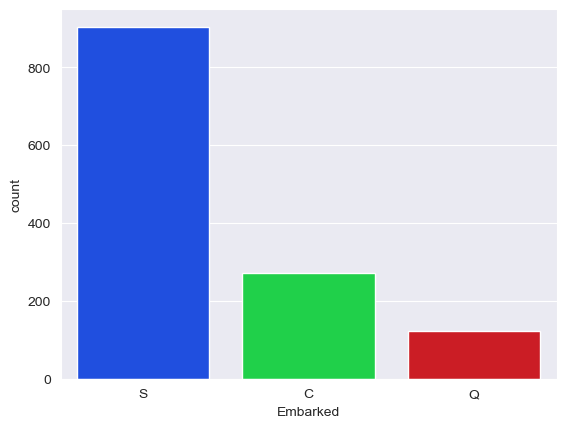

In [70]:
sns.countplot(x="Embarked", data=train_df)

In [71]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])  # Converting the Embarked column to categorical. One hot encoding.
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,FamilySize,FSize_0,FSize_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


### Ticket
<a id="25"></a>

* Ticket: Ticket number of the passenger.

In [72]:
train_df["Ticket"].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [73]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():  # If the ticket is not a number.
        tickets.append(i.replace(".", "").replace("/", "").strip().split(" ")[0])  # Take the prefix.
    else:
        tickets.append("X")
train_df["Ticket"] = tickets

In [74]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          X
4          X
5          X
6          X
7          X
8          X
9          X
10        PP
11         X
12        A5
13         X
14         X
15         X
16         X
17         X
18         X
19         X
Name: Ticket, dtype: object

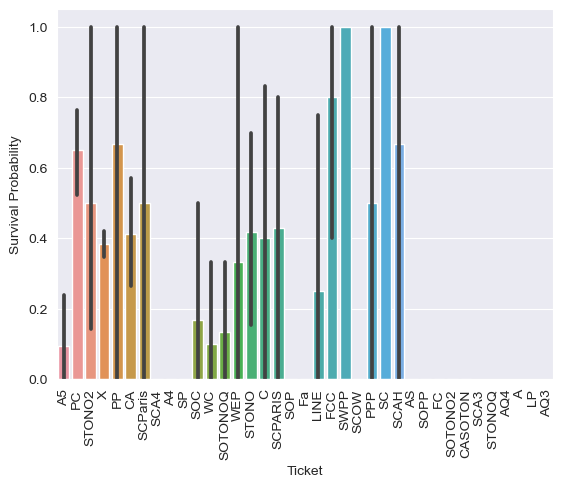

In [75]:
g = sns.barplot(x="Ticket", y="Survived", data=train_df)
g.set_ylabel("Survival Probability")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

In [76]:
train_df = pd.get_dummies(train_df, columns=["Ticket"], prefix="Tckt")  # Converting the Ticket column to categorical. One hot encoding.

In [77]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,Tckt_SOTONO2,Tckt_SOTONOQ,Tckt_SP,Tckt_STONO,Tckt_STONO2,Tckt_STONOQ,Tckt_SWPP,Tckt_WC,Tckt_WEP,Tckt_X
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1


### Pclass
<a id="26"></a>

<Axes: xlabel='Pclass', ylabel='count'>

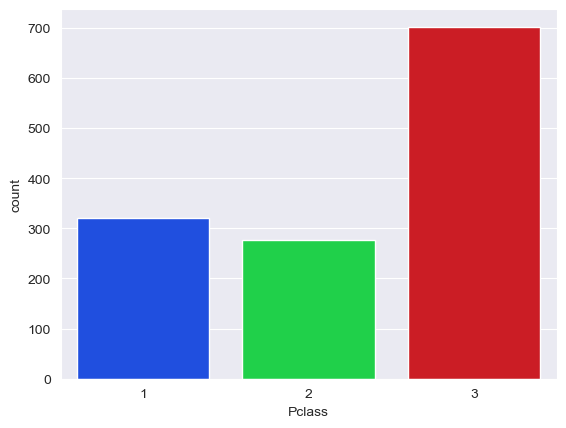

In [78]:
sns.countplot(x="Pclass", data=train_df)

In [79]:
train_df["Pclass"] = train_df["Pclass"].astype("category")  # Converting the Pclass column to categorical.
train_df = pd.get_dummies(train_df, columns=["Pclass"])  # Converting the Pclass column to categorical. One hot encoding.

In [80]:
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,Tckt_STONO,Tckt_STONO2,Tckt_STONOQ,Tckt_SWPP,Tckt_WC,Tckt_WEP,Tckt_X,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,1,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


### Sex
<a id="27"></a>

In [81]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,Tckt_STONOQ,Tckt_SWPP,Tckt_WC,Tckt_WEP,Tckt_X,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


### Drop Passenger ID and Cabin
<a id="28"></a>

In [82]:
train_df.drop(labels=["PassengerId", "Cabin"], axis=1, inplace=True)  # Dropping the PassengerId and Cabin columns.

In [83]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'FamilySize', 'FSize_0', 'FSize_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Tckt_A', 'Tckt_A4', 'Tckt_A5', 'Tckt_AQ3',
       'Tckt_AQ4', 'Tckt_AS', 'Tckt_C', 'Tckt_CA', 'Tckt_CASOTON', 'Tckt_FC',
       'Tckt_FCC', 'Tckt_Fa', 'Tckt_LINE', 'Tckt_LP', 'Tckt_PC', 'Tckt_PP',
       'Tckt_PPP', 'Tckt_SC', 'Tckt_SCA3', 'Tckt_SCA4', 'Tckt_SCAH',
       'Tckt_SCOW', 'Tckt_SCPARIS', 'Tckt_SCParis', 'Tckt_SOC', 'Tckt_SOP',
       'Tckt_SOPP', 'Tckt_SOTONO2', 'Tckt_SOTONOQ', 'Tckt_SP', 'Tckt_STONO',
       'Tckt_STONO2', 'Tckt_STONOQ', 'Tckt_SWPP', 'Tckt_WC', 'Tckt_WEP',
       'Tckt_X', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1'],
      dtype='object')

## Modeling
<a id="29"></a>

In [84]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Train - Test Split
<a id="30"></a>

In [85]:
train_df_len

881

In [86]:
test = train_df[train_df_len:]
test.drop(labels=["Survived"], axis=1, inplace=True) # Dropping the survived column. Because we will predict it.

In [87]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,FamilySize,FSize_0,...,Tckt_STONOQ,Tckt_SWPP,Tckt_WC,Tckt_WEP,Tckt_X,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [88]:
train = train_df[:train_df_len]
X = train.drop(labels=["Survived"], axis=1)  # Features
y = train["Survived"]  # Label

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)  # Splitting the train data into train and test data.
print("X_train", len(X_train))
print("X_test", len(X_val))
print("y_train", len(y_train))
print("y_test", len(y_val))
print("test", len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


### Simple Logistic Regression
<a id="31"></a>

In [89]:
logreg = LogisticRegression()  # Creating the model. Simple logistic regression.
logreg.fit(X_train, y_train)  # Training the model.
acc_log_train = round(logreg.score(X_train, y_train) * 100, 2)  # Evaluating the model.
acc_log_val = round(logreg.score(X_val, y_val) * 100, 2)  # Evaluating the model.
print("Training Accuracy: % {}".format(acc_log_train))
print("Validation Accuracy: % {}".format(acc_log_val))

Training Accuracy: % 86.27
Validation Accuracy: % 77.32


### Hyperparameter Tuning -- Grid Search -- Cross Validation
<a id="32"></a>

* We will compare 5 machine learning classifier and evaluate mean accuracy of each of them by stratified cross validation.
* Stratified cross validation means that each fold will contain approximately the same percentage of samples of each target class as the complete set.
* Hyperparameter tuning for the best ones. (Decision Tree, SVM, Random Forest, KNN, Logistic Regression) Best parameters for the models.

In [90]:
classifier = [DecisionTreeClassifier,
              SVC,
              RandomForestClassifier,
              LogisticRegression,
              KNeighborsClassifier
              ]


In [97]:
# decision_tree_param_grid means that we will try all of the values in the decision_tree_param_grid.

decision_tree_param_grid = {"min_samples_split": range(10, 500, 20),
                 "max_depth": range(1, 20, 2)}
# min_samples_split means that the minimum number of samples required to split an internal node.
# max_depth means that the maximum depth of the tree.

In [98]:
# svc_param_grid means that we will try all of the values in the svc_param_grid.

svc_param_grid = {"kernel": ["rbf"],
                  "gamma": [0.001, 0.01, 0.1, 1],
                  "C": [1, 10, 50, 100, 200, 300, 1000]}

# C means that the penalty parameter of the error term. gamma means that kernel coefficient. rbf means that Radial Basis Function. Gamma is a parameter of RBF kernel type and controls the influence of individual training samples - Support Vector Machines.

In [99]:
random_forest_param_grid = {"max_features": [1, 3, 10],
                            "min_samples_split": [2, 3, 10],
                            "min_samples_leaf": [1, 3, 10],
                            "bootstrap": [False],
                            "n_estimators": [100, 300],
                            "criterion": ["gini"]}

In [100]:
logistic_regression_param_grid = {"C": np.logspace(-3, 3, 7),
                                  "penalty": ["l1", "l2"]}

In [95]:
np.logspace(-3, 3, 7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [101]:
knn_param_grid = {"n_neighbors": np.linspace(1, 19, 10, dtype=int).tolist(),
                  "weights": ["uniform", "distance"],
                  "metric": ["euclidean", "manhattan"]}

In [96]:
np.linspace(1, 19, 10, dtype=int)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [102]:
classifier_param = [decision_tree_param_grid,
                    svc_param_grid,
                    random_forest_param_grid,
                    logistic_regression_param_grid,
                    knn_param_grid]

In [103]:
cross_val_result = []  # Cross validation result. We will append the results of the cross validation to this list.
best_estimators = []  # Best estimators. We will append the best estimators to this list.

for i in range(len(classifier)):  # For each classifier.
    clf = GridSearchCV(classifier[i](),  # Grid search cross validation.
                       param_grid=classifier_param[i],  # Parameters.
                       cv=StratifiedKFold(n_splits=10),  # Cross validation with 10 splits.
                       scoring="accuracy",  # Accuracy is the metric.
                       n_jobs=-1,  # Using all processors.
                       verbose=1)  # Showing the results.
    clf.fit(X_train, y_train)  # Training the model.
    cross_val_result.append(clf.best_score_)  # Appending the best score to the cross_val_result list.
    best_estimators.append(clf.best_estimator_)  # Appending the best estimator to the best_estimators list.
    print(cross_val_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8508474576271187
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8423728813559321
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8576271186440678
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8593220338983052
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8084745762711864


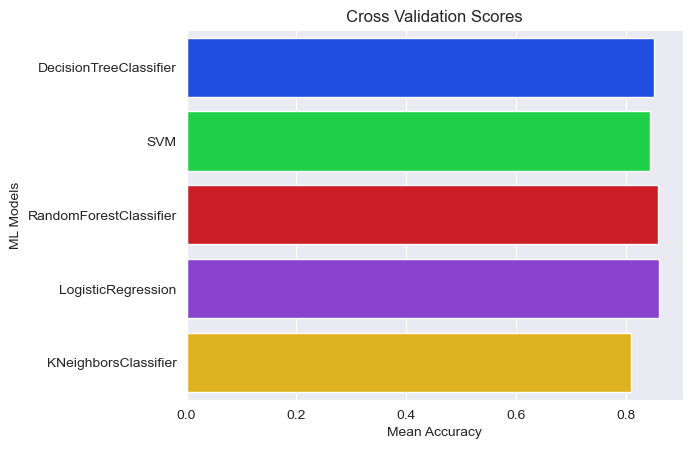

In [105]:
cross_val_results = pd.DataFrame({
    "Cross Validation Means": cross_val_result,
    "ML Models": [
        "DecisionTreeClassifier",
        "SVM",
        "RandomForestClassifier",
        "LogisticRegression",
        "KNeighborsClassifier"
    ]
})

g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cross_val_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

plt.show()

### Ensemble Modeling
<a id="33"></a>

* We will combine the models and get a better model.
* Ensemble modeling is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets.
* Voting Classifier


In [109]:
best_estimators

[DecisionTreeClassifier(max_depth=3, min_samples_split=10),
 SVC(C=100, gamma=0.001),
 RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=3,
                        min_samples_split=10),
 LogisticRegression(),
 KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')]

In [108]:
# voting_classifier means that we will combine the models and get a better model.

voting_classifier = VotingClassifier(estimators=[
    ("decision_tree_classifier", best_estimators[0]),
    ("random_forest_classifier", best_estimators[2]),
    ("logistic_regression_classifier", best_estimators[3])
], voting="soft", n_jobs=-1)

voting_classifier = voting_classifier.fit(X_train, y_train)  # Training the model.
print(accuracy_score(voting_classifier.predict(X_val), y_val))  # Evaluating the model.

0.7766323024054983


### Prediction and Submission
<a id="34"></a>

In [110]:
test_survived = pd.Series(voting_classifier.predict(test), name="Survived").astype(int)  # Predicting the test data.
results = pd.concat([test_passenger_id, test_survived], axis=1)  # Concatenating the test_passenger_id and test_survived.
results.to_csv("titanic.csv", index=False)  # Saving the results to the titanic.csv file.

In [113]:
test_survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int32

In [112]:
gender_submission = pd.read_csv("gender_submission.csv")
print(accuracy_score(voting_classifier.predict(test), gender_submission["Survived"]))

0.9521531100478469
